# Merging data

In [1]:
import pandas as pd

In [2]:
# Load the datasets
stooq_df = pd.read_csv('results/stooq_merged.csv')
gdelt_df = pd.read_csv('results/gdelt_economic_signals.csv')

print("Stooq dataset shape:", stooq_df.shape)
print("GDELT dataset shape:", gdelt_df.shape)
print("\nFirst few dates from Stooq:", stooq_df['Date'].head())
print("\nFirst few dates from GDELT:", gdelt_df['Date'].head())

Stooq dataset shape: (4289, 25)
GDELT dataset shape: (4631, 5)

First few dates from Stooq: 0    2013-04-01
1    2013-04-02
2    2013-04-03
3    2013-04-04
4    2013-04-05
Name: Date, dtype: object

First few dates from GDELT: 0    20130406
1    20130405
2    20130407
3    20130401
4    20130413
Name: Date, dtype: int64


In [3]:
# Convert GDELT date format from '20130406' to '2013-04-06'
gdelt_df['Date'] = pd.to_datetime(gdelt_df['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

print("Converted GDELT dates:")
print(gdelt_df['Date'].head())

Converted GDELT dates:
0    2013-04-06
1    2013-04-05
2    2013-04-07
3    2013-04-01
4    2013-04-13
Name: Date, dtype: object


In [4]:
# Merge datasets on Date (inner join to keep only shared dates)
merged_df = pd.merge(stooq_df, gdelt_df, on='Date', how='inner').dropna(how="any", axis=0)

print(f"Merged dataset shape: {merged_df.shape}")
print(f"\nNumber of shared dates: {len(merged_df)}")
print(f"\nDate range: {merged_df['Date'].min()} to {merged_df['Date'].max()}")
print("\nFirst few rows of merged dataset:")
merged_df

Merged dataset shape: (2927, 29)

Number of shared dates: 2927

Date range: 2013-04-02 to 2025-12-02

First few rows of merged dataset:


,Date,MSFT_Open,MSFT_Close,MSFT_Volume,NKX_Open,NKX_Close,NKX_Volume,NDX_Open,NDX_Close,NDX_Volume,...,AAPL_Open,AAPL_Close,AAPL_Volume,SPX_Open,SPX_Close,SPX_Volume,News_Sentiment,News_Disagreement,News_Volatility,News_Volume
2,2013-04-02,23.3841,23.5588,3.479098e+07,12051.57,12003.43,2.744706e+09,2809.00,2820.62,2.725517e+08,...,13.0579,13.1249,619413882.0,1562.17,1570.25,1.840089e+09,-2.037748,3.777087,6.568702,11640
3,2013-04-02,23.3841,23.5588,3.479098e+07,12051.57,12003.43,2.744706e+09,2809.00,2820.62,2.725517e+08,...,13.0579,13.1249,619413882.0,1562.17,1570.25,1.840089e+09,-2.037748,3.777087,6.568702,11640
4,2013-04-03,23.5148,23.3596,4.286561e+07,12112.09,12362.20,2.350040e+09,2821.97,2795.04,3.127431e+08,...,13.1732,13.1910,424559739.0,1570.25,1553.69,2.255894e+09,-2.174459,3.731097,6.649827,12604
5,2013-04-03,23.5148,23.3596,4.286561e+07,12112.09,12362.20,2.350040e+09,2821.97,2795.04,3.127431e+08,...,13.1732,13.1910,424559739.0,1570.25,1553.69,2.255894e+09,-2.174459,3.731097,6.649827,12604
6,2013-04-04,23.2240,23.3841,5.533617e+07,12188.22,12634.54,3.093806e+09,2794.42,2794.93,2.544345e+08,...,13.2461,13.0608,419245607.0,1553.69,1559.98,1.861483e+09,-2.141963,3.756189,6.618138,12091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616,2025-11-25,474.0700,476.9900,2.801979e+07,49113.82,48659.52,1.444754e+09,24790.07,25018.36,1.332991e+09,...,275.2700,276.9700,46914220.0,6697.03,6765.88,3.329985e+09,-0.456922,4.080827,6.843367,80083
4617,2025-11-26,486.3100,485.5000,2.570908e+07,49012.25,49559.07,1.341321e+09,25168.31,25236.94,9.978964e+08,...,276.9600,277.5500,33431423.0,6793.55,6812.61,2.733199e+09,-0.651273,4.134776,6.892623,80148
4619,2025-11-28,487.5950,492.0100,1.438673e+07,50218.96,50253.91,9.823054e+08,25310.29,25434.89,6.371038e+08,...,277.2600,278.8500,20135620.0,6822.52,6849.09,1.476620e+09,-0.830720,4.204370,6.984102,61462
4622,2025-12-01,488.4350,486.7400,2.396399e+07,50318.59,49303.28,1.181701e+09,25232.75,25342.85,1.042249e+09,...,278.0100,283.1000,46587722.0,6812.30,6812.63,2.809389e+09,-0.709380,4.271857,6.977046,67326


In [5]:
# Save the merged dataset
merged_df.to_csv('results/merged_stooq_gdelt.csv', index=False)
print("Merged dataset saved to 'results/merged_stooq_gdelt.csv'")

Merged dataset saved to 'results/merged_stooq_gdelt.csv'


# Modelling

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load your data
df = pd.read_csv('results/merged_stooq_gdelt.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

# === 2. Feature Engineering ===
data = df.copy()

# A. Create Target: Predict SPX Direction Next Day (1=Up, 0=Down)
# We use Log Returns for stationarity
data['Return'] = np.log(data['SPX_Close'] / data['SPX_Close'].shift(1))
data['Target'] = (data['Return'].shift(-1) > 0).astype(int)

# B. Market Features (Stationary)
# 1. Past Returns (Lags) - Does momentum persist?
data['Ret_Lag1'] = data['Return']
data['Ret_Lag2'] = data['Return'].shift(1)
data['Ret_Lag5'] = data['Return'].shift(4)

# 2. Volatility (Risk)
data['Vol_20'] = data['Return'].rolling(20).std()

# 3. Intraday Momentum (Replaces Price_Pos)
# If Close > Open, it indicates intraday buying pressure.
data['Intraday_Move'] = (data['SPX_Close'] - data['SPX_Open']) / data['SPX_Open']

# C. Sentiment Features (The Alpha)
# Smooth the noise: Daily sentiment is erratic; 3-day and 7-day trends are signals.
data['Sent_MA_3'] = data['News_Sentiment'].rolling(3).mean()
data['Sent_MA_7'] = data['News_Sentiment'].rolling(7).mean()
data['Sent_Vol_5'] = data['News_Volatility'].rolling(5).mean() # Stability of news
data['Sent_Disagreement_MA'] = data['News_Disagreement'].rolling(3).mean()

# Interaction: Sentiment * Volume
# High sentiment is more significant when News Volume is high.
# We normalize volume first to keep scales consistent.
data['News_Vol_Norm'] = data['News_Volume'] / data['News_Volume'].rolling(20).mean()
data['Sent_Impact'] = data['News_Sentiment'] * data['News_Vol_Norm']

# Drop NaNs created by rolling windows/shifting
data = data.dropna()

# === 3. Walk-Forward Validation ===
# We use the columns we just created
features = [
    'Ret_Lag1', 'Ret_Lag2', 'Ret_Lag5', 'Vol_20', 'Intraday_Move',
    'Sent_MA_3', 'Sent_MA_7', 'Sent_Vol_5', 'Sent_Impact', 'Sent_Disagreement_MA'
]
X = data[features]
y = data['Target']

# Use the first 70% of data to train, test on the remaining 30%
train_size = int(len(data) * 0.7)

print(f"Training on {train_size} days, testing on {len(data)-train_size} days...")

# Initialize Random Forest
# max_depth=5 prevents overfitting on small datasets
# min_samples_leaf=10 ensures we don't trade on outliers
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

# Train and Predict
model.fit(X.iloc[:train_size], y.iloc[:train_size])
preds = model.predict(X.iloc[train_size:])
actuals = y.iloc[train_size:]

# === 4. Evaluation ===
acc = accuracy_score(actuals, preds)
print(f"Directional Accuracy: {acc:.2%}")

print("\nFeature Importance:")
# This tells you IF the sentiment data is actually useful
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(importances)

print("\nClassification Report:")
print(classification_report(actuals, preds))

Training on 2034 days, testing on 873 days...
Directional Accuracy: 50.63%

Feature Importance:
Ret_Lag1                0.149634
Intraday_Move           0.120846
Ret_Lag5                0.110513
Ret_Lag2                0.096200
Vol_20                  0.094578
Sent_MA_3               0.092288
Sent_Disagreement_MA    0.090111
Sent_MA_7               0.088289
Sent_Vol_5              0.079507
Sent_Impact             0.078034
dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.21      0.29       425
           1       0.51      0.79      0.62       448

    accuracy                           0.51       873
   macro avg       0.50      0.50      0.46       873
weighted avg       0.50      0.51      0.46       873



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# === 1. Load & Clean Data ===
# Assuming 'df' is your dataframe with columns: 
# ['Date', 'SPX_Close', 'SPX_Volume', 'News_Sentiment', 'News_Volume']
data = df.copy()

# A. Create Target: Next Day Return Direction (1=Up, 0=Down)
data['Return'] = np.log(data['SPX_Close'] / data['SPX_Close'].shift(1))
data['Target_Next_Dir'] = (data['Return'].shift(-1) > 0).astype(int)

# B. Feature Engineering (Shared Features)
# 1. Technicals
data['Vol_20'] = data['Return'].rolling(20).std()
data['Ret_Lag1'] = data['Return']
data['Ret_Lag2'] = data['Return'].shift(1)
data['Ret_Lag5'] = data['Return'].shift(4)

# 2. Sentiment Features (Smoothed)
data['Sent_MA_3'] = data['News_Sentiment'].rolling(3).mean()
data['Sent_MA_7'] = data['News_Sentiment'].rolling(7).mean()

# 3. Interaction Feature (Sentiment * Relative Volume)
# "High Volume" amplifies the "Sentiment Signal"
vol_ma = data['News_Volume'].rolling(20).mean()
data['Sent_Impact'] = data['News_Sentiment'] * (data['News_Volume'] / vol_ma)

data = data.dropna()

# Select Features for Models
# Note: LSTM will use raw sequences; RF will use these pre-calculated lags.
features = ['Return', 'Vol_20', 'Sent_MA_3', 'Sent_MA_7', 'Sent_Impact']
target = 'Target_Next_Dir'

# === Split Data (Chronological - NO SHUFFLING) ===
train_size = int(len(data) * 0.7)
train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

print(f"Train samples: {len(train_df)}, Test samples: {len(test_df)}")

Train samples: 2034, Test samples: 873


In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# === Configuration ===
SEQ_LEN = 7   # Look back 7 days
BATCH_SIZE = 32
HIDDEN_DIM = 32
EPOCHS = 20

# === 1. Scale & Sequence ===
# Scale features (Fit on Train ONLY to avoid leakage)
scaler = StandardScaler()
X_train_raw = scaler.fit_transform(train_df[features])
X_test_raw = scaler.transform(test_df[features])

y_train_raw = train_df[target].values
y_test_raw = test_df[target].values

def create_sequences(X, y, seq_len):
    xs, ys = [], []
    for i in range(len(X) - seq_len):
        xs.append(X[i:(i + seq_len)])
        ys.append(y[i + seq_len])
    return np.array(xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_raw, y_train_raw, SEQ_LEN)
X_test_seq, y_test_seq = create_sequences(X_test_raw, y_test_raw, SEQ_LEN)

# To Tensor
train_loader = DataLoader(TensorDataset(torch.FloatTensor(X_train_seq), torch.FloatTensor(y_train_seq)), batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(TensorDataset(torch.FloatTensor(X_test_seq), torch.FloatTensor(y_test_seq)), batch_size=BATCH_SIZE, shuffle=False)

# === 2. Define LSTM Model ===
class MarketLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(MarketLSTM, self).__init__()
        # batch_first=True -> (batch, seq, feature)
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, num_layers=1)
        self.dropout = nn.Dropout(0.4) 
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        out = self.dropout(hn[-1]) # Use last hidden state
        out = self.fc(out)
        return out

# === 3. Train LSTM ===
model_lstm = MarketLSTM(input_dim=len(features), hidden_dim=HIDDEN_DIM)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001, weight_decay=1e-4)

print("Training LSTM...")
for epoch in range(EPOCHS):
    model_lstm.train()
    for X_b, y_b in train_loader:
        optimizer.zero_grad()
        y_pred = model_lstm(X_b)
        loss = criterion(y_pred, y_b.unsqueeze(1))
        loss.backward()
        optimizer.step()

# === 4. LSTM Prediction ===
model_lstm.eval()
with torch.no_grad():
    y_pred_logits = model_lstm(torch.FloatTensor(X_test_seq))
    # Convert logits to probability > 0.5 -> 1, else 0
    preds_lstm = (torch.sigmoid(y_pred_logits) > 0.5).float().numpy().flatten()

acc_lstm = accuracy_score(y_test_seq, preds_lstm)
print(f"LSTM Accuracy: {acc_lstm:.4f}")

Training LSTM...
LSTM Accuracy: 0.5150


In [11]:
from sklearn.ensemble import RandomForestClassifier

# === 1. Prepare Data for RF ===
# RF needs 2D array (Samples, Features).
# IMPORTANT: We must trim the first SEQ_LEN rows from Train/Test to match LSTM alignment
# (The LSTM lost the first 7 days creating sequences; RF must look at the same dates)
X_train_rf = train_df[features].iloc[SEQ_LEN:]
y_train_rf = train_df[target].iloc[SEQ_LEN:]

X_test_rf = test_df[features].iloc[SEQ_LEN:]
y_test_rf = test_df[target].iloc[SEQ_LEN:]

# === 2. Train Random Forest ===
# max_depth=5 prevents overfitting on noise
model_rf = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf=10, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

# === 3. RF Prediction ===
preds_rf = model_rf.predict(X_test_rf)
acc_rf = accuracy_score(y_test_rf, preds_rf)

print(f"Random Forest Accuracy: {acc_rf:.4f}")

# Feature Importance Check
importances = pd.Series(model_rf.feature_importances_, index=features).sort_values(ascending=False)
print("\nRF Feature Importance:")
print(importances)

Random Forest Accuracy: 0.5012

RF Feature Importance:
Return         0.256160
Vol_20         0.200517
Sent_Impact    0.193812
Sent_MA_7      0.179651
Sent_MA_3      0.169860
dtype: float64



=== MODEL SHOWDOWN ===
LSTM Accuracy:        51.50%
Random Forest Acc:    50.12%
------------------------------
🏆 Winner: LSTM (Complex temporal patterns found)


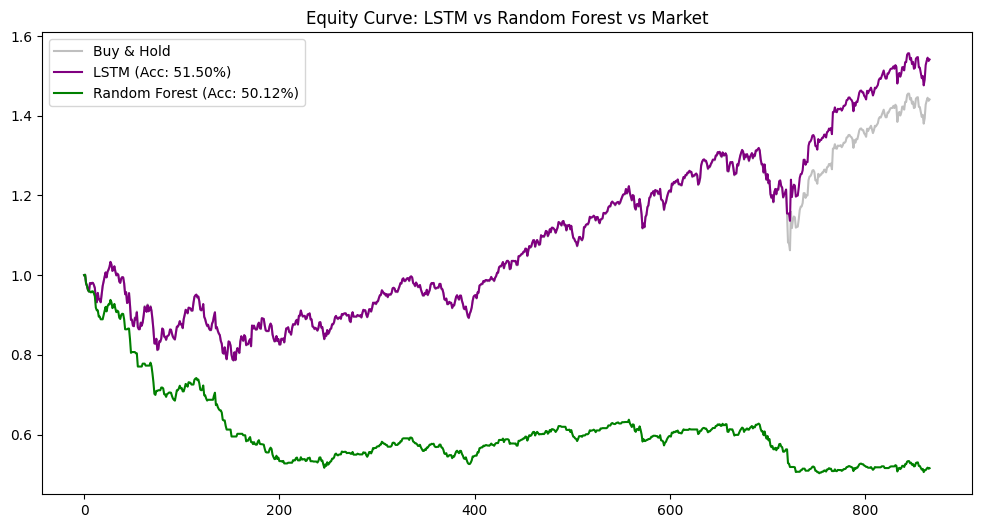

In [12]:
# === Comparative Dashboard ===
print("\n=== MODEL SHOWDOWN ===")
print(f"LSTM Accuracy:        {acc_lstm:.2%}")
print(f"Random Forest Acc:    {acc_rf:.2%}")
print("-" * 30)

if acc_lstm > acc_rf:
    print("🏆 Winner: LSTM (Complex temporal patterns found)")
else:
    print("🏆 Winner: Random Forest (Robustness to noise prevailed)")

# === Cumulative Return Curve (Hypothetical Trading) ===
# Let's simulate investing $1 based on predictions
# Logic: If pred=1, Buy/Hold. If pred=0, Cash (Return=0).
# Note: We use y_test_rf index to get actual returns
actual_returns = test_df['Return'].iloc[SEQ_LEN:].values

# Calculate Strategy Returns
equity_lstm = [1.0]
equity_rf = [1.0]
equity_hold = [1.0]

for i in range(len(actual_returns)):
    ret = actual_returns[i]
    
    # Buy & Hold
    equity_hold.append(equity_hold[-1] * (1 + ret))
    
    # LSTM Strategy
    # If pred is 1, we get the return. If 0, we get 0.
    equity_lstm.append(equity_lstm[-1] * (1 + (ret if preds_lstm[i] == 1 else 0)))
    
    # RF Strategy
    equity_rf.append(equity_rf[-1] * (1 + (ret if preds_rf[i] == 1 else 0)))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(equity_hold, label='Buy & Hold', color='gray', alpha=0.5)
plt.plot(equity_lstm, label=f'LSTM (Acc: {acc_lstm:.2%})', color='purple')
plt.plot(equity_rf, label=f'Random Forest (Acc: {acc_rf:.2%})', color='green')
plt.title("Equity Curve: LSTM vs Random Forest vs Market")
plt.legend()
plt.show()

# 🧪 RIGOROUS SENTIMENT ANALYSIS EXPERIMENT
## Goal: Test if sentiment adds incremental predictive power
### Methodology:
1. **Baseline Models**: Technical features only (NO sentiment)
2. **Challenger Models**: Technical + Sentiment features
3. **Benchmark**: Compare both against Buy & Hold
4. **Validation**: Walk-forward time series cross-validation
5. **Statistical Tests**: Ensure improvements are significant

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import (accuracy_score, roc_auc_score, log_loss, 
                              brier_score_loss, classification_report)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Reload clean data
df = pd.read_csv('results/merged_stooq_gdelt.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

# === STEP 1: Feature Engineering ===
data = df.copy()

# Target: Next-day return direction
data['Return'] = np.log(data['SPX_Close'] / data['SPX_Close'].shift(1))
data['Target'] = (data['Return'].shift(-1) > 0).astype(int)

# --- BASELINE FEATURES (Technical Only - NO Sentiment) ---
data['Ret_Lag1'] = data['Return']
data['Ret_Lag2'] = data['Return'].shift(1)
data['Ret_Lag3'] = data['Return'].shift(2)
data['Ret_Lag5'] = data['Return'].shift(4)
data['Vol_20'] = data['Return'].rolling(20).std()
data['Vol_5'] = data['Return'].rolling(5).std()
data['Intraday_Move'] = (data['SPX_Close'] - data['SPX_Open']) / data['SPX_Open']
data['Volume_Ratio'] = data['SPX_Volume'] / data['SPX_Volume'].rolling(20).mean()

# --- SENTIMENT FEATURES (To be tested separately) ---
data['Sent_MA_3'] = data['News_Sentiment'].rolling(3).mean()
data['Sent_MA_7'] = data['News_Sentiment'].rolling(7).mean()
data['Sent_Vol_5'] = data['News_Volatility'].rolling(5).mean()
data['Sent_Disagreement_MA'] = data['News_Disagreement'].rolling(3).mean()
data['News_Vol_Norm'] = data['News_Volume'] / data['News_Volume'].rolling(20).mean()
data['Sent_Impact'] = data['News_Sentiment'] * data['News_Vol_Norm']

# Drop NaNs
data = data.dropna()

print(f"✅ Total samples after cleaning: {len(data)}")
print(f"📅 Date range: {data.index.min().date()} to {data.index.max().date()}")
print(f"📊 Target distribution: {data['Target'].value_counts().to_dict()}")
print(f"⚖️ Class balance: {data['Target'].mean():.1%} UP days")

✅ Total samples after cleaning: 2907
📅 Date range: 2013-04-16 to 2025-12-02
📊 Target distribution: {1: 1507, 0: 1400}
⚖️ Class balance: 51.8% UP days


## 📊 STEP 1: Baseline Models (NO Sentiment) - Must Beat Buy & Hold!

In [32]:
# Define feature sets
features_baseline = [
    'Ret_Lag1', 'Ret_Lag2', 'Ret_Lag3', 'Ret_Lag5', 
    'Vol_20', 'Vol_5', 'Intraday_Move', 'Volume_Ratio'
]

features_challenger = features_baseline + [
    'Sent_MA_3', 'Sent_MA_7', 'Sent_Vol_5', 
    'Sent_Impact', 'Sent_Disagreement_MA'
]

target = 'Target'

# === Walk-Forward Cross-Validation ===
# Use 5 splits to avoid overfitting to one time period
tscv = TimeSeriesSplit(n_splits=5)

X = data[features_baseline]
y = data[target]

results = []

print("🔄 Running Walk-Forward Validation (Baseline - NO Sentiment)...\n")

for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    # Train/Test Split
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    train_fold = data.iloc[train_idx]
    test_fold = data.iloc[test_idx]
    
    # Train Model
    model_base = RandomForestClassifier(
        n_estimators=200, 
        max_depth=5, 
        min_samples_leaf=10, 
        random_state=42,
        n_jobs=-1
    )
    model_base.fit(X_train, y_train)
    
    # Predictions
    preds_base = model_base.predict(X_test)
    probs_base = model_base.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc_base = accuracy_score(y_test, preds_base)
    
    # Calculate Strategy Returns
    actual_returns = test_fold['Return'].values
    
    # Baseline Strategy: Only trade when model predicts UP
    strategy_returns_base = np.where(preds_base == 1, actual_returns, 0)
    
    # Buy & Hold
    buyhold_returns = actual_returns
    
    # Cumulative Returns
    cum_strat_base = (1 + strategy_returns_base).prod() - 1
    cum_buyhold = (1 + buyhold_returns).prod() - 1
    
    # Sharpe Ratio (annualized, assuming 252 trading days)
    sharpe_base = (strategy_returns_base.mean() / strategy_returns_base.std()) * np.sqrt(252) if strategy_returns_base.std() > 0 else 0
    sharpe_buyhold = (buyhold_returns.mean() / buyhold_returns.std()) * np.sqrt(252)
    
    results.append({
        'Fold': fold,
        'Train_Start': train_fold.index.min().date(),
        'Train_End': train_fold.index.max().date(),
        'Test_Start': test_fold.index.min().date(),
        'Test_End': test_fold.index.max().date(),
        'Accuracy_Base': acc_base,
        'Return_Base': cum_strat_base,
        'Return_BuyHold': cum_buyhold,
        'Sharpe_Base': sharpe_base,
        'Sharpe_BuyHold': sharpe_buyhold,
        'Beats_BH': cum_strat_base > cum_buyhold
    })
    
    print(f"Fold {fold}: Acc={acc_base:.2%} | Base Return={cum_strat_base:+.2%} | Buy&Hold={cum_buyhold:+.2%} | {'✅ WIN' if cum_strat_base > cum_buyhold else '❌ LOSS'}")

results_df = pd.DataFrame(results)
print("\n" + "="*80)
print(f"📈 BASELINE MODEL SUMMARY (NO Sentiment)")
print("="*80)
print(f"Average Accuracy:     {results_df['Accuracy_Base'].mean():.2%}")
print(f"Average Return:       {results_df['Return_Base'].mean():+.2%}")
print(f"Buy & Hold Avg:       {results_df['Return_BuyHold'].mean():+.2%}")
print(f"Sharpe (Strategy):    {results_df['Sharpe_Base'].mean():.2f}")
print(f"Sharpe (Buy & Hold):  {results_df['Sharpe_BuyHold'].mean():.2f}")
print(f"Folds Beating B&H:    {results_df['Beats_BH'].sum()}/{len(results_df)}")

if results_df['Return_Base'].mean() > results_df['Return_BuyHold'].mean():
    print("\n✅ BASELINE MODEL BEATS BUY & HOLD - Proceed to test sentiment!")
else:
    print("\n⚠️  WARNING: Baseline does NOT beat Buy & Hold consistently")
    print("   Consider: More features, longer lookback, or accept market efficiency")

🔄 Running Walk-Forward Validation (Baseline - NO Sentiment)...

Fold 1: Acc=52.27% | Base Return=-35.89% | Buy&Hold=+13.53% | ❌ LOSS
Fold 2: Acc=49.17% | Base Return=-51.87% | Buy&Hold=+18.97% | ❌ LOSS
Fold 3: Acc=53.93% | Base Return=-67.18% | Buy&Hold=+40.09% | ❌ LOSS
Fold 4: Acc=49.59% | Base Return=-71.14% | Buy&Hold=-5.10% | ❌ LOSS
Fold 5: Acc=52.27% | Base Return=-22.00% | Buy&Hold=+51.95% | ❌ LOSS

📈 BASELINE MODEL SUMMARY (NO Sentiment)
Average Accuracy:     51.45%
Average Return:       -49.62%
Buy & Hold Avg:       +23.89%
Sharpe (Strategy):    -2.81
Sharpe (Buy & Hold):  0.68
Folds Beating B&H:    0/5

⚠️  WARNING: Baseline does NOT beat Buy & Hold consistently
   Consider: More features, longer lookback, or accept market efficiency


## 🆚 STEP 2: Challenger Models (WITH Sentiment) - Does it add value?

In [33]:
X_chall = data[features_challenger]

results_challenger = []

print("🔄 Running Walk-Forward Validation (WITH Sentiment)...\n")

for fold, (train_idx, test_idx) in enumerate(tscv.split(X_chall), 1):
    # Train/Test Split
    X_train, X_test = X_chall.iloc[train_idx], X_chall.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    train_fold = data.iloc[train_idx]
    test_fold = data.iloc[test_idx]
    
    # Train Model
    model_chall = RandomForestClassifier(
        n_estimators=200, 
        max_depth=5, 
        min_samples_leaf=10, 
        random_state=42,
        n_jobs=-1
    )
    model_chall.fit(X_train, y_train)
    
    # Predictions
    preds_chall = model_chall.predict(X_test)
    probs_chall = model_chall.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc_chall = accuracy_score(y_test, preds_chall)
    
    # Calculate Strategy Returns
    actual_returns = test_fold['Return'].values
    
    # Challenger Strategy
    strategy_returns_chall = np.where(preds_chall == 1, actual_returns, 0)
    
    # Buy & Hold
    buyhold_returns = actual_returns
    
    # Cumulative Returns
    cum_strat_chall = (1 + strategy_returns_chall).prod() - 1
    cum_buyhold = (1 + buyhold_returns).prod() - 1
    
    # Sharpe Ratio
    sharpe_chall = (strategy_returns_chall.mean() / strategy_returns_chall.std()) * np.sqrt(252) if strategy_returns_chall.std() > 0 else 0
    sharpe_buyhold = (buyhold_returns.mean() / buyhold_returns.std()) * np.sqrt(252)
    
    results_challenger.append({
        'Fold': fold,
        'Accuracy_Chall': acc_chall,
        'Return_Chall': cum_strat_chall,
        'Return_BuyHold': cum_buyhold,
        'Sharpe_Chall': sharpe_chall,
        'Sharpe_BuyHold': sharpe_buyhold,
        'Beats_BH': cum_strat_chall > cum_buyhold
    })
    
    print(f"Fold {fold}: Acc={acc_chall:.2%} | Chall Return={cum_strat_chall:+.2%} | Buy&Hold={cum_buyhold:+.2%} | {'✅ WIN' if cum_strat_chall > cum_buyhold else '❌ LOSS'}")

results_chall_df = pd.DataFrame(results_challenger)
print("\n" + "="*80)
print(f"📈 CHALLENGER MODEL SUMMARY (WITH Sentiment)")
print("="*80)
print(f"Average Accuracy:     {results_chall_df['Accuracy_Chall'].mean():.2%}")
print(f"Average Return:       {results_chall_df['Return_Chall'].mean():+.2%}")
print(f"Buy & Hold Avg:       {results_chall_df['Return_BuyHold'].mean():+.2%}")
print(f"Sharpe (Strategy):    {results_chall_df['Sharpe_Chall'].mean():.2f}")
print(f"Sharpe (Buy & Hold):  {results_chall_df['Sharpe_BuyHold'].mean():.2f}")
print(f"Folds Beating B&H:    {results_chall_df['Beats_BH'].sum()}/{len(results_chall_df)}")

🔄 Running Walk-Forward Validation (WITH Sentiment)...

Fold 1: Acc=50.00% | Chall Return=-37.73% | Buy&Hold=+13.53% | ❌ LOSS
Fold 2: Acc=48.14% | Chall Return=-52.93% | Buy&Hold=+18.97% | ❌ LOSS
Fold 3: Acc=51.86% | Chall Return=-62.94% | Buy&Hold=+40.09% | ❌ LOSS
Fold 4: Acc=48.14% | Chall Return=-72.12% | Buy&Hold=-5.10% | ❌ LOSS
Fold 5: Acc=49.17% | Chall Return=+3.26% | Buy&Hold=+51.95% | ❌ LOSS

📈 CHALLENGER MODEL SUMMARY (WITH Sentiment)
Average Accuracy:     49.46%
Average Return:       -44.49%
Buy & Hold Avg:       +23.89%
Sharpe (Strategy):    -2.58
Sharpe (Buy & Hold):  0.68
Folds Beating B&H:    0/5


## 📊 STEP 3: Statistical Significance Testing

In [34]:
# Merge results for comparison
comparison_df = pd.DataFrame({
    'Baseline_Return': results_df['Return_Base'],
    'Challenger_Return': results_chall_df['Return_Chall'],
    'BuyHold_Return': results_df['Return_BuyHold'],
    'Baseline_Sharpe': results_df['Sharpe_Base'],
    'Challenger_Sharpe': results_chall_df['Sharpe_Chall']
})

print("="*80)
print("🔬 STATISTICAL SIGNIFICANCE TESTS")
print("="*80)

# 1. Paired t-test: Baseline vs Challenger Returns
t_stat, p_value = stats.ttest_rel(results_chall_df['Return_Chall'], results_df['Return_Base'])
print(f"\n1️⃣ Paired t-test (Challenger vs Baseline Returns):")
print(f"   t-statistic: {t_stat:.4f}")
print(f"   p-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"   ✅ Sentiment adds STATISTICALLY SIGNIFICANT value (p < 0.05)")
else:
    print(f"   ❌ No significant improvement from sentiment (p >= 0.05)")

# 2. Wilcoxon signed-rank test (non-parametric alternative)
w_stat, w_pvalue = stats.wilcoxon(results_chall_df['Return_Chall'], results_df['Return_Base'])
print(f"\n2️⃣ Wilcoxon Signed-Rank Test (Robustness Check):")
print(f"   W-statistic: {w_stat:.4f}")
print(f"   p-value: {w_pvalue:.4f}")

# 3. Effect Size (Cohen's d)
mean_diff = results_chall_df['Return_Chall'].mean() - results_df['Return_Base'].mean()
pooled_std = np.sqrt((results_df['Return_Base'].std()**2 + results_chall_df['Return_Chall'].std()**2) / 2)
cohens_d = mean_diff / pooled_std if pooled_std > 0 else 0

print(f"\n3️⃣ Effect Size (Cohen's d):")
print(f"   Cohen's d: {cohens_d:.4f}")
if abs(cohens_d) < 0.2:
    effect = "Small/Negligible"
elif abs(cohens_d) < 0.5:
    effect = "Small"
elif abs(cohens_d) < 0.8:
    effect = "Medium"
else:
    effect = "Large"
print(f"   Interpretation: {effect} effect")

# 4. Win Rate: How often does Challenger beat Baseline?
wins = (results_chall_df['Return_Chall'] > results_df['Return_Base']).sum()
total = len(results_df)
win_rate = wins / total
print(f"\n4️⃣ Win Rate (Challenger > Baseline):")
print(f"   {wins}/{total} folds = {win_rate:.1%}")

print("\n" + "="*80)
print("📋 VERDICT:")
print("="*80)

criteria_met = []
criteria_failed = []

if p_value < 0.05:
    criteria_met.append("✅ Statistically significant (p < 0.05)")
else:
    criteria_failed.append("❌ Not statistically significant")

if results_chall_df['Return_Chall'].mean() > results_df['Return_Base'].mean():
    criteria_met.append(f"✅ Higher avg return (+{(results_chall_df['Return_Chall'].mean() - results_df['Return_Base'].mean())*100:.2f}%)")
else:
    criteria_failed.append("❌ Lower avg return")

if win_rate > 0.6:
    criteria_met.append(f"✅ Strong win rate ({win_rate:.1%})")
else:
    criteria_failed.append(f"⚠️ Weak win rate ({win_rate:.1%})")

if results_chall_df['Return_Chall'].mean() > results_df['Return_BuyHold'].mean():
    criteria_met.append("✅ Beats Buy & Hold")
else:
    criteria_failed.append("❌ Does not beat Buy & Hold")

print("\n".join(criteria_met))
print("\n".join(criteria_failed))

if len(criteria_failed) == 0:
    print("\n🎉 CONCLUSION: Sentiment analysis adds MEANINGFUL predictive power!")
elif p_value < 0.05:
    print("\n⚠️  CONCLUSION: Sentiment helps statistically, but practical value is limited")
else:
    print("\n❌ CONCLUSION: Sentiment does NOT add incremental predictive power")

🔬 STATISTICAL SIGNIFICANCE TESTS

1️⃣ Paired t-test (Challenger vs Baseline Returns):
   t-statistic: 0.9949
   p-value: 0.3761
   ❌ No significant improvement from sentiment (p >= 0.05)

2️⃣ Wilcoxon Signed-Rank Test (Robustness Check):
   W-statistic: 6.0000
   p-value: 0.8125

3️⃣ Effect Size (Cohen's d):
   Cohen's d: 0.2004
   Interpretation: Small effect

4️⃣ Win Rate (Challenger > Baseline):
   2/5 folds = 40.0%

📋 VERDICT:
✅ Higher avg return (+5.12%)
❌ Not statistically significant
⚠️ Weak win rate (40.0%)
❌ Does not beat Buy & Hold

❌ CONCLUSION: Sentiment does NOT add incremental predictive power


## 📈 STEP 4: Comprehensive Performance Dashboard

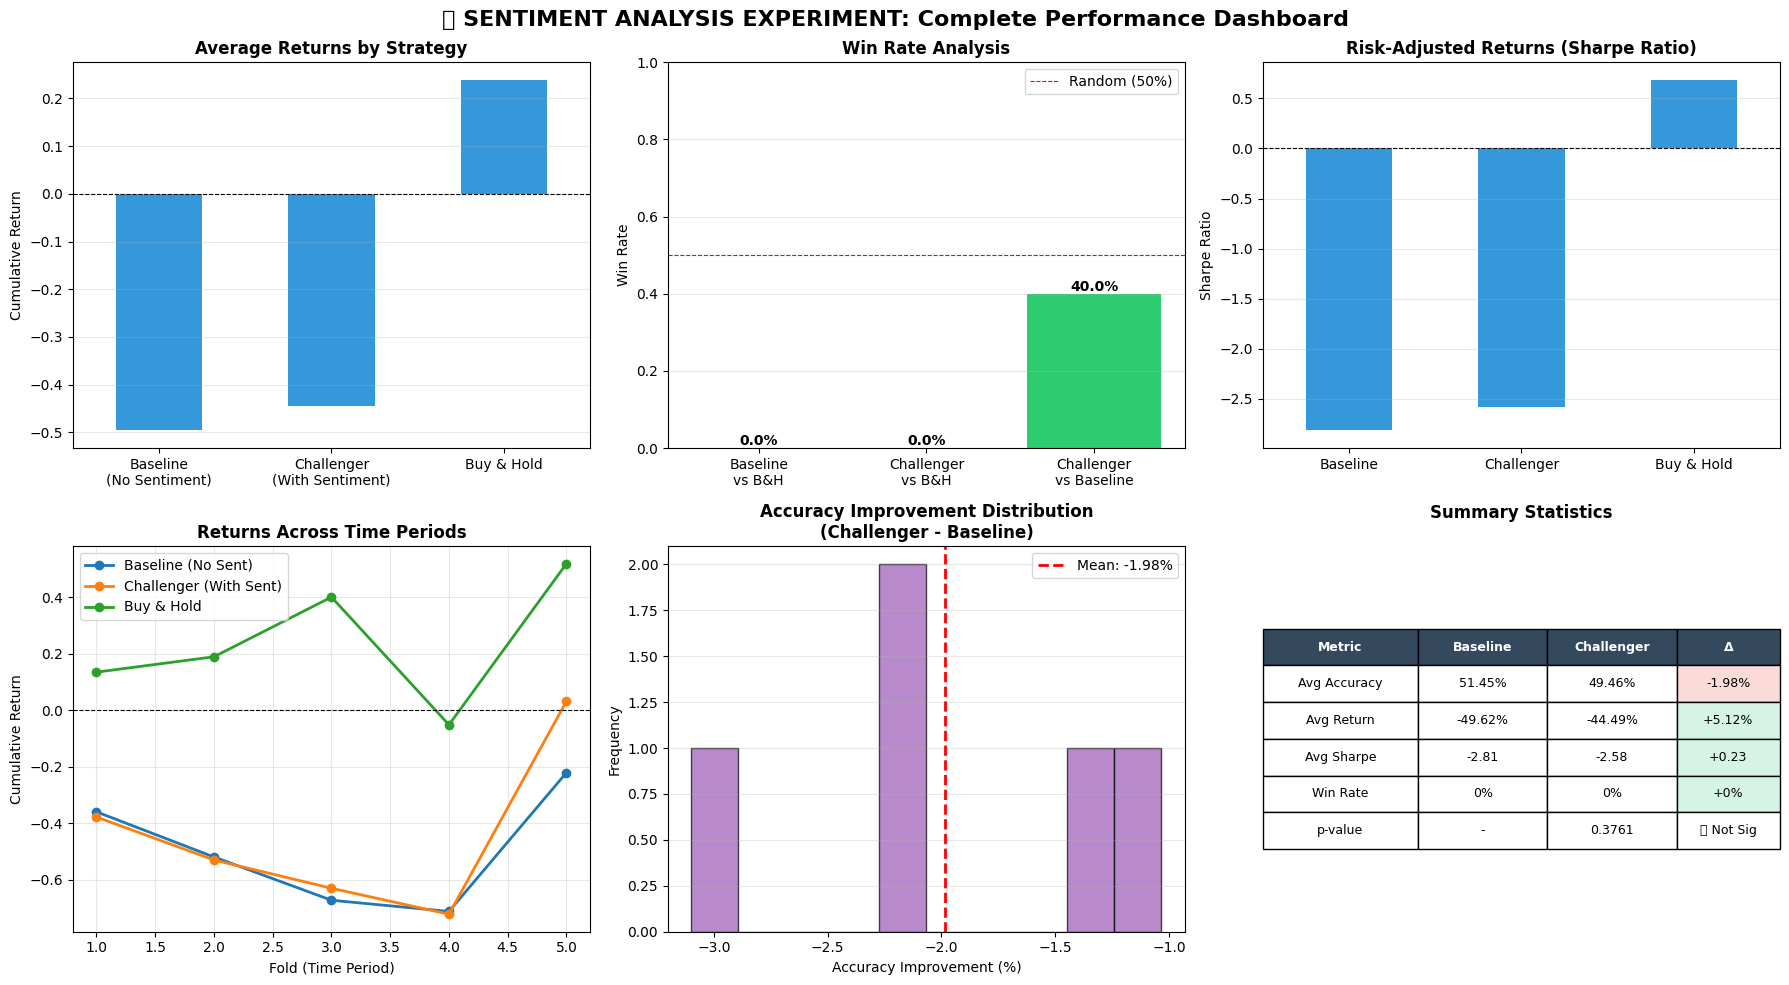

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('🧪 SENTIMENT ANALYSIS EXPERIMENT: Complete Performance Dashboard', 
             fontsize=16, fontweight='bold')

# 1. Returns Comparison (Bar Chart)
ax1 = axes[0, 0]
comparison_data = pd.DataFrame({
    'Baseline\n(No Sentiment)': [results_df['Return_Base'].mean()],
    'Challenger\n(With Sentiment)': [results_chall_df['Return_Chall'].mean()],
    'Buy & Hold': [results_df['Return_BuyHold'].mean()]
})
comparison_data.T.plot(kind='bar', ax=ax1, legend=False, color=['#3498db', '#e74c3c', '#95a5a6'])
ax1.set_title('Average Returns by Strategy', fontweight='bold')
ax1.set_ylabel('Cumulative Return')
ax1.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis='y', alpha=0.3)

# 2. Win Rate Comparison
ax2 = axes[0, 1]
win_data = pd.DataFrame({
    'Strategy': ['Baseline\nvs B&H', 'Challenger\nvs B&H', 'Challenger\nvs Baseline'],
    'Win_Rate': [
        results_df['Beats_BH'].mean(),
        results_chall_df['Beats_BH'].mean(),
        (results_chall_df['Return_Chall'] > results_df['Return_Base']).mean()
    ]
})
bars = ax2.bar(win_data['Strategy'], win_data['Win_Rate'], color=['#3498db', '#e74c3c', '#2ecc71'])
ax2.set_title('Win Rate Analysis', fontweight='bold')
ax2.set_ylabel('Win Rate')
ax2.axhline(0.5, color='red', linestyle='--', linewidth=0.8, label='Random (50%)')
ax2.set_ylim(0, 1)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

# 3. Sharpe Ratio Comparison
ax3 = axes[0, 2]
sharpe_data = pd.DataFrame({
    'Baseline': [results_df['Sharpe_Base'].mean()],
    'Challenger': [results_chall_df['Sharpe_Chall'].mean()],
    'Buy & Hold': [results_df['Sharpe_BuyHold'].mean()]
})
sharpe_data.T.plot(kind='bar', ax=ax3, legend=False, color=['#3498db', '#e74c3c', '#95a5a6'])
ax3.set_title('Risk-Adjusted Returns (Sharpe Ratio)', fontweight='bold')
ax3.set_ylabel('Sharpe Ratio')
ax3.tick_params(axis='x', rotation=0)
ax3.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax3.grid(axis='y', alpha=0.3)

# 4. Fold-by-Fold Returns
ax4 = axes[1, 0]
fold_comparison = pd.DataFrame({
    'Fold': range(1, 6),
    'Baseline': results_df['Return_Base'].values,
    'Challenger': results_chall_df['Return_Chall'].values,
    'Buy & Hold': results_df['Return_BuyHold'].values
})
fold_comparison.plot(x='Fold', y=['Baseline', 'Challenger', 'Buy & Hold'], 
                     ax=ax4, marker='o', linewidth=2)
ax4.set_title('Returns Across Time Periods', fontweight='bold')
ax4.set_ylabel('Cumulative Return')
ax4.set_xlabel('Fold (Time Period)')
ax4.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax4.grid(alpha=0.3)
ax4.legend(['Baseline (No Sent)', 'Challenger (With Sent)', 'Buy & Hold'])

# 5. Accuracy Improvement Distribution
ax5 = axes[1, 1]
acc_improvements = (results_chall_df['Accuracy_Chall'].values - results_df['Accuracy_Base'].values) * 100
ax5.hist(acc_improvements, bins=10, color='#9b59b6', edgecolor='black', alpha=0.7)
ax5.axvline(acc_improvements.mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {acc_improvements.mean():.2f}%')
ax5.set_title('Accuracy Improvement Distribution\n(Challenger - Baseline)', fontweight='bold')
ax5.set_xlabel('Accuracy Improvement (%)')
ax5.set_ylabel('Frequency')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 6. Summary Statistics Table
ax6 = axes[1, 2]
ax6.axis('off')
summary_stats = [
    ['Metric', 'Baseline', 'Challenger', 'Δ'],
    ['Avg Accuracy', f"{results_df['Accuracy_Base'].mean():.2%}", 
     f"{results_chall_df['Accuracy_Chall'].mean():.2%}",
     f"{(results_chall_df['Accuracy_Chall'].mean() - results_df['Accuracy_Base'].mean())*100:+.2f}%"],
    ['Avg Return', f"{results_df['Return_Base'].mean():+.2%}", 
     f"{results_chall_df['Return_Chall'].mean():+.2%}",
     f"{(results_chall_df['Return_Chall'].mean() - results_df['Return_Base'].mean())*100:+.2f}%"],
    ['Avg Sharpe', f"{results_df['Sharpe_Base'].mean():.2f}", 
     f"{results_chall_df['Sharpe_Chall'].mean():.2f}",
     f"{results_chall_df['Sharpe_Chall'].mean() - results_df['Sharpe_Base'].mean():+.2f}"],
    ['Win Rate', f"{results_df['Beats_BH'].mean():.0%}", 
     f"{results_chall_df['Beats_BH'].mean():.0%}",
     f"{(results_chall_df['Beats_BH'].mean() - results_df['Beats_BH'].mean())*100:+.0f}%"],
    ['p-value', '-', f"{p_value:.4f}", 
     '✅ Sig' if p_value < 0.05 else '❌ Not Sig']
]

table = ax6.table(cellText=summary_stats, cellLoc='center', loc='center',
                  colWidths=[0.3, 0.25, 0.25, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header row
for i in range(4):
    table[(0, i)].set_facecolor('#34495e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color code delta column
for i in range(1, len(summary_stats)):
    delta_cell = table[(i, 3)]
    try:
        if '+' in summary_stats[i][3]:
            delta_cell.set_facecolor('#d5f4e6')
        elif '-' in summary_stats[i][3]:
            delta_cell.set_facecolor('#fadbd8')
    except:
        pass

ax6.set_title('Summary Statistics', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## 🔍 STEP 5: Deep Dive - Feature Importance & Model Calibration

🎯 FEATURE IMPORTANCE ANALYSIS

📊 Top 10 Features (Challenger Model with Sentiment):
Ret_Lag1                0.116427
Volume_Ratio            0.100297
Intraday_Move           0.097412
Ret_Lag5                0.084424
Vol_5                   0.081908
Sent_Disagreement_MA    0.070087
Vol_20                  0.067428
Ret_Lag2                0.067411
Sent_MA_3               0.065724
Sent_Impact             0.063822
dtype: float64

📈 Feature Group Importance:
   Sentiment Features:  32.4%
   Technical Features:  67.6%

   ⚠️  No sentiment features in top 5 - may indicate weak signal


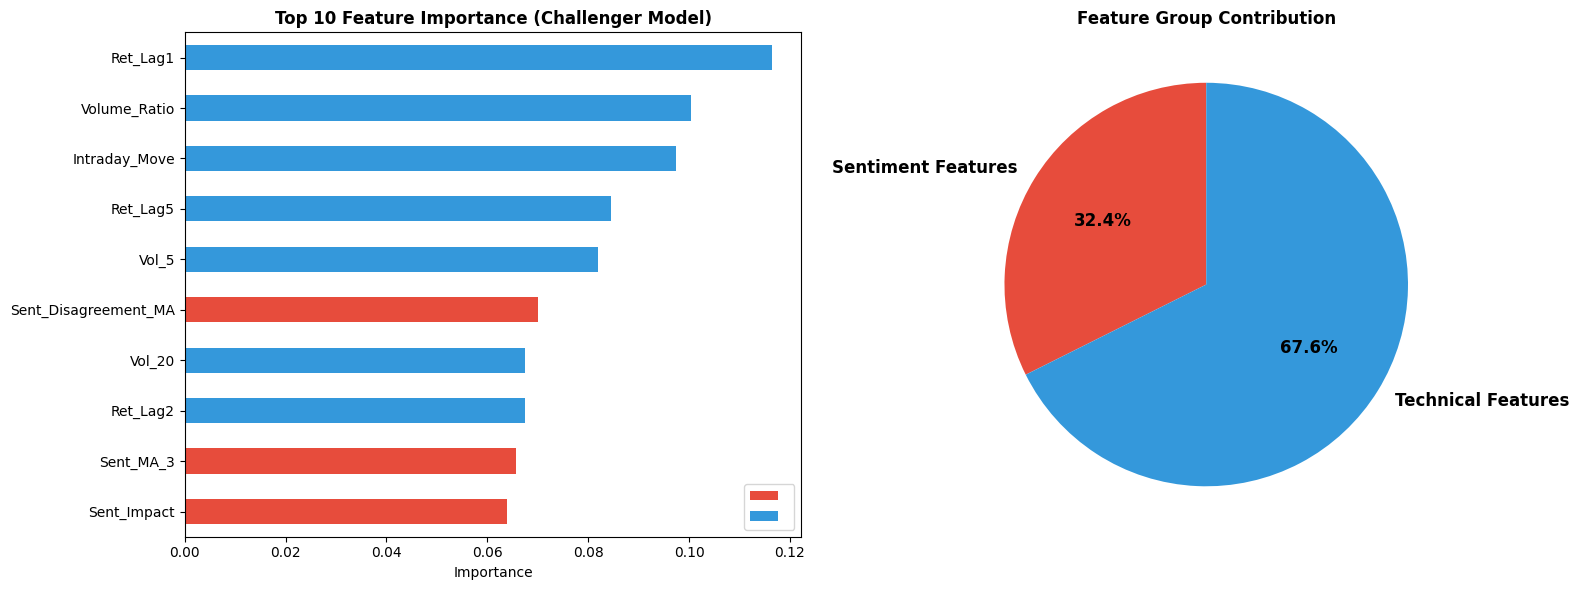

In [37]:
# Train final models on full training set for feature importance analysis
train_size = int(len(data) * 0.7)
train_full = data.iloc[:train_size]
test_full = data.iloc[train_size:]

# Baseline Model
X_train_base = train_full[features_baseline]
y_train = train_full[target]
X_test_base = test_full[features_baseline]
y_test = test_full[target]

model_base_final = RandomForestClassifier(n_estimators=200, max_depth=5, 
                                          min_samples_leaf=10, random_state=42, n_jobs=-1)
model_base_final.fit(X_train_base, y_train)
preds_base_final = model_base_final.predict(X_test_base)
probs_base = model_base_final.predict_proba(X_test_base)[:, 1]

# Challenger Model
X_train_chall = train_full[features_challenger]
X_test_chall = test_full[features_challenger]

model_chall_final = RandomForestClassifier(n_estimators=200, max_depth=5, 
                                           min_samples_leaf=10, random_state=42, n_jobs=-1)
model_chall_final.fit(X_train_chall, y_train)
preds_chall_final = model_chall_final.predict(X_test_chall)
probs_chall = model_chall_final.predict_proba(X_test_chall)[:, 1]

# === Feature Importance Analysis ===
print("="*80)
print("🎯 FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Challenger Model Feature Importance
importances_chall = pd.Series(
    model_chall_final.feature_importances_, 
    index=features_challenger
).sort_values(ascending=False)

print("\n📊 Top 10 Features (Challenger Model with Sentiment):")
print(importances_chall.head(10))

# Identify sentiment features
sentiment_features = ['Sent_MA_3', 'Sent_MA_7', 'Sent_Vol_5', 'Sent_Impact', 'Sent_Disagreement_MA']
sentiment_importance = importances_chall[sentiment_features].sum()
technical_importance = importances_chall.drop(sentiment_features).sum()

print(f"\n📈 Feature Group Importance:")
print(f"   Sentiment Features:  {sentiment_importance:.1%}")
print(f"   Technical Features:  {technical_importance:.1%}")

# Check if any sentiment feature is in top 5
sentiment_in_top5 = any(feat in importances_chall.head(5).index for feat in sentiment_features)
if sentiment_in_top5:
    print(f"\n   ✅ At least one sentiment feature is in TOP 5!")
    best_feature = [f for f in importances_chall.head(5).index if f in sentiment_features][0]
    print(f"   🏆 Best sentiment feature: {best_feature}")
else:
    print(f"\n   ⚠️  No sentiment features in top 5 - may indicate weak signal")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Feature Importance Bar Chart
ax1 = axes[0]
colors_perm = ['#e74c3c' if f in sentiment_features else '#3498db' for f in importances_chall.head(10).index]
importances_chall.head(10).plot(kind='barh', ax=ax1, color=colors_perm)
ax1.set_title('Top 10 Feature Importance (Challenger Model)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Importance')
ax1.invert_yaxis()
ax1.legend(['Sentiment Features', 'Technical Features'], 
           handles=[plt.Rectangle((0,0),1,1, fc='#e74c3c'), 
                   plt.Rectangle((0,0),1,1, fc='#3498db')])

# Sentiment vs Technical Pie Chart
ax2 = axes[1]
colors = ['#e74c3c', '#3498db']
ax2.pie([sentiment_importance, technical_importance], 
        labels=['Sentiment Features', 'Technical Features'],
        autopct='%1.1f%%', startangle=90, colors=colors,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Feature Group Contribution', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


🎲 PROBABILITY CALIBRATION ANALYSIS

📊 Calibration Metrics (Test Set):

Metric               Baseline        Challenger      Winner
-----------------------------------------------------------------
Brier Score          0.2517          0.2517          ✅ Challenger
Log Loss             0.6967          0.6965          ✅ Challenger
ROC AUC              0.4972          0.4859          ✅ Baseline


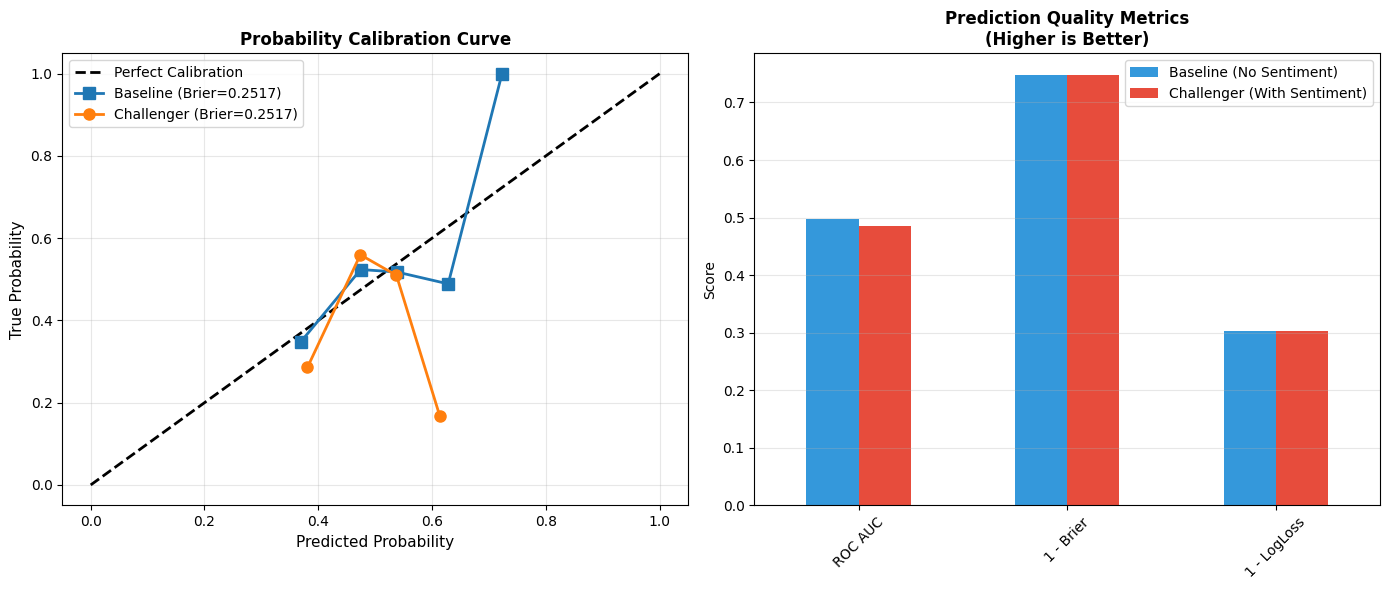


🎯 MODEL CONFIDENCE ANALYSIS

📈 High Confidence Predictions (prob > 0.6 or < 0.4):
   Baseline:   69/873 predictions (7.9%)
               Accuracy: 55.07%
   Challenger: 13/873 predictions (1.5%)
               Accuracy: 46.15%

   ⚠️  Baseline is more accurate when confident


In [38]:
# === Probability Calibration Analysis ===
from sklearn.calibration import calibration_curve

print("\n" + "="*80)
print("🎲 PROBABILITY CALIBRATION ANALYSIS")
print("="*80)

# Calculate calibration curves
prob_true_base, prob_pred_base = calibration_curve(y_test, probs_base, n_bins=10)
prob_true_chall, prob_pred_chall = calibration_curve(y_test, probs_chall, n_bins=10)

# Brier Score (lower is better)
brier_base = brier_score_loss(y_test, probs_base)
brier_chall = brier_score_loss(y_test, probs_chall)

# Log Loss (lower is better)
logloss_base = log_loss(y_test, probs_base)
logloss_chall = log_loss(y_test, probs_chall)

# ROC AUC
auc_base = roc_auc_score(y_test, probs_base)
auc_chall = roc_auc_score(y_test, probs_chall)

print(f"\n📊 Calibration Metrics (Test Set):")
print(f"\n{'Metric':<20} {'Baseline':<15} {'Challenger':<15} {'Winner'}")
print(f"{'-'*65}")
print(f"{'Brier Score':<20} {brier_base:<15.4f} {brier_chall:<15.4f} {'✅ Challenger' if brier_chall < brier_base else '✅ Baseline'}")
print(f"{'Log Loss':<20} {logloss_base:<15.4f} {logloss_chall:<15.4f} {'✅ Challenger' if logloss_chall < logloss_base else '✅ Baseline'}")
print(f"{'ROC AUC':<20} {auc_base:<15.4f} {auc_chall:<15.4f} {'✅ Challenger' if auc_chall > auc_base else '✅ Baseline'}")

# Visualize Calibration
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Calibration Curve
ax1 = axes[0]
ax1.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration', linewidth=2)
ax1.plot(prob_pred_base, prob_true_base, 's-', label=f'Baseline (Brier={brier_base:.4f})', 
         markersize=8, linewidth=2)
ax1.plot(prob_pred_chall, prob_true_chall, 'o-', label=f'Challenger (Brier={brier_chall:.4f})', 
         markersize=8, linewidth=2)
ax1.set_xlabel('Predicted Probability', fontsize=11)
ax1.set_ylabel('True Probability', fontsize=11)
ax1.set_title('Probability Calibration Curve', fontweight='bold', fontsize=12)
ax1.legend(loc='best')
ax1.grid(alpha=0.3)

# Metrics Comparison
ax2 = axes[1]
metrics_data = pd.DataFrame({
    'Baseline': [auc_base, 1-brier_base, 1-logloss_base],
    'Challenger': [auc_chall, 1-brier_chall, 1-logloss_chall]
}, index=['ROC AUC', '1 - Brier', '1 - LogLoss'])

metrics_data.plot(kind='bar', ax=ax2, color=['#3498db', '#e74c3c'])
ax2.set_title('Prediction Quality Metrics\n(Higher is Better)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Score')
ax2.set_xlabel('')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(['Baseline (No Sentiment)', 'Challenger (With Sentiment)'])
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# === Model Confidence Analysis ===
print("\n" + "="*80)
print("🎯 MODEL CONFIDENCE ANALYSIS")
print("="*80)

# High Confidence Predictions (prob > 0.6 or < 0.4)
high_conf_base = (probs_base > 0.6) | (probs_base < 0.4)
high_conf_chall = (probs_chall > 0.6) | (probs_chall < 0.4)

acc_high_conf_base = accuracy_score(y_test[high_conf_base], preds_base_final[high_conf_base])
acc_high_conf_chall = accuracy_score(y_test[high_conf_chall], preds_chall_final[high_conf_chall])

print(f"\n📈 High Confidence Predictions (prob > 0.6 or < 0.4):")
print(f"   Baseline:   {high_conf_base.sum()}/{len(y_test)} predictions ({high_conf_base.mean():.1%})")
print(f"               Accuracy: {acc_high_conf_base:.2%}")
print(f"   Challenger: {high_conf_chall.sum()}/{len(y_test)} predictions ({high_conf_chall.mean():.1%})")
print(f"               Accuracy: {acc_high_conf_chall:.2%}")

if acc_high_conf_chall > acc_high_conf_base:
    print(f"\n   ✅ Challenger is more accurate when confident!")
else:
    print(f"\n   ⚠️  Baseline is more accurate when confident")

## 📉 STEP 6: Risk Analysis & Drawdown

⚠️  RISK METRICS (Test Period)

Metric                    Baseline        Challenger      Buy & Hold     
----------------------------------------------------------------------
Total Return                     -76.76%        -70.39%         43.79%
Volatility (Ann.)                 13.95%         14.37%         18.45%
Sharpe Ratio                       -2.95          -2.37           0.66
Max Drawdown                     -77.63%        -72.37%        -24.00%
Win Rate                          36.54%         38.03%         51.43%
Information Ratio                  -4.70          -4.20            N/A


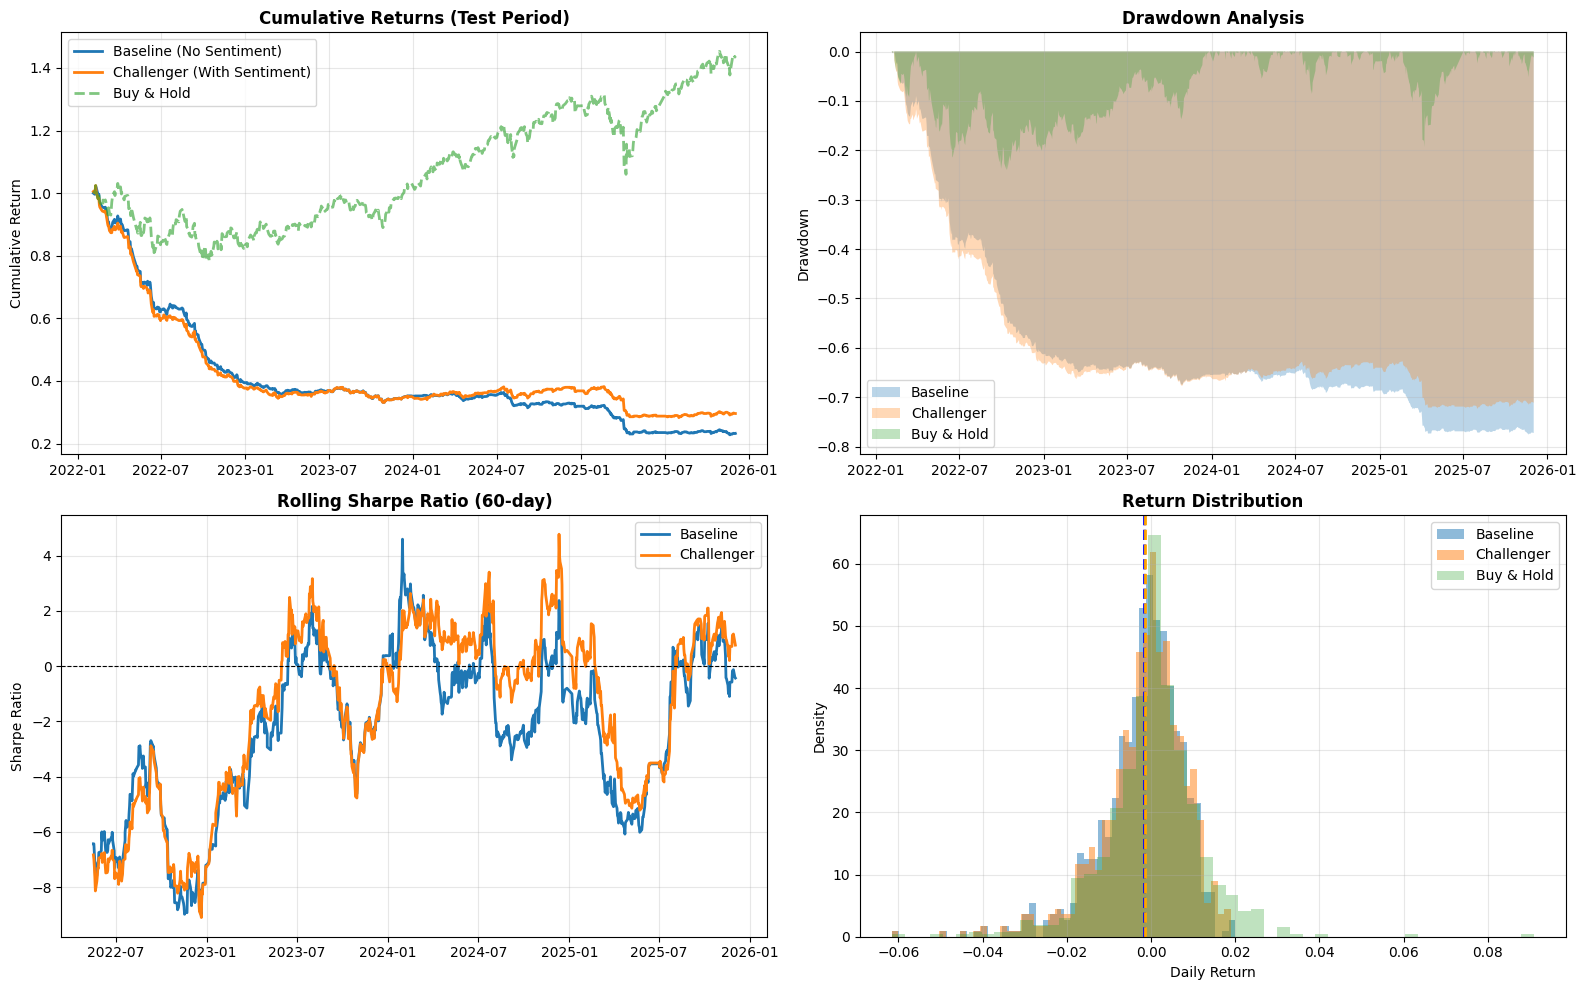

In [39]:
# Calculate returns for test period
actual_returns = test_full['Return'].values

# Strategy returns
baseline_returns = np.where(preds_base_final == 1, actual_returns, 0)
challenger_returns = np.where(preds_chall_final == 1, actual_returns, 0)
buyhold_returns = actual_returns

# Cumulative returns
baseline_cum = (1 + baseline_returns).cumprod()
challenger_cum = (1 + challenger_returns).cumprod()
buyhold_cum = (1 + buyhold_returns).cumprod()

# === Drawdown Calculation ===
def calculate_drawdown(cumulative_returns):
    """Calculate drawdown series"""
    running_max = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - running_max) / running_max
    return drawdown

baseline_dd = calculate_drawdown(baseline_cum)
challenger_dd = calculate_drawdown(challenger_cum)
buyhold_dd = calculate_drawdown(buyhold_cum)

# === Risk Metrics ===
print("="*80)
print("⚠️  RISK METRICS (Test Period)")
print("="*80)

metrics_baseline = {
    'Total Return': (baseline_cum[-1] - 1),
    'Volatility (Ann.)': baseline_returns.std() * np.sqrt(252),
    'Sharpe Ratio': (baseline_returns.mean() / baseline_returns.std()) * np.sqrt(252) if baseline_returns.std() > 0 else 0,
    'Max Drawdown': baseline_dd.min(),
    'Win Rate': (baseline_returns > 0).mean(),
    'Information Ratio': np.nan
}

metrics_challenger = {
    'Total Return': (challenger_cum[-1] - 1),
    'Volatility (Ann.)': challenger_returns.std() * np.sqrt(252),
    'Sharpe Ratio': (challenger_returns.mean() / challenger_returns.std()) * np.sqrt(252) if challenger_returns.std() > 0 else 0,
    'Max Drawdown': challenger_dd.min(),
    'Win Rate': (challenger_returns > 0).mean(),
    'Information Ratio': np.nan
}

# Calculate Information Ratio (excess return over baseline per unit of tracking error)
excess_base = baseline_returns - buyhold_returns
excess_chall = challenger_returns - buyhold_returns

ir_base = (excess_base.mean() / excess_base.std()) * np.sqrt(252) if excess_base.std() > 0 else 0
ir_chall = (excess_chall.mean() / excess_chall.std()) * np.sqrt(252) if excess_chall.std() > 0 else 0

metrics_baseline['Information Ratio'] = ir_base
metrics_challenger['Information Ratio'] = ir_chall

# Buy & Hold metrics
buyhold_return = (buyhold_cum[-1] - 1)
buyhold_vol = buyhold_returns.std() * np.sqrt(252)
buyhold_sharpe = (buyhold_returns.mean() / buyhold_returns.std()) * np.sqrt(252)

print(f"\n{'Metric':<25} {'Baseline':<15} {'Challenger':<15} {'Buy & Hold':<15}")
print(f"{'-'*70}")
print(f"{'Total Return':<25} {metrics_baseline['Total Return']:>14.2%} {metrics_challenger['Total Return']:>14.2%} {buyhold_return:>14.2%}")
print(f"{'Volatility (Ann.)':<25} {metrics_baseline['Volatility (Ann.)']:>14.2%} {metrics_challenger['Volatility (Ann.)']:>14.2%} {buyhold_vol:>14.2%}")
print(f"{'Sharpe Ratio':<25} {metrics_baseline['Sharpe Ratio']:>14.2f} {metrics_challenger['Sharpe Ratio']:>14.2f} {buyhold_sharpe:>14.2f}")
print(f"{'Max Drawdown':<25} {metrics_baseline['Max Drawdown']:>14.2%} {metrics_challenger['Max Drawdown']:>14.2%} {buyhold_dd.min():>14.2%}")
print(f"{'Win Rate':<25} {metrics_baseline['Win Rate']:>14.2%} {metrics_challenger['Win Rate']:>14.2%} {(buyhold_returns > 0).mean():>14.2%}")
print(f"{'Information Ratio':<25} {metrics_baseline['Information Ratio']:>14.2f} {metrics_challenger['Information Ratio']:>14.2f} {'N/A':>14}")

# === Visualizations ===
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Cumulative Returns
ax1 = axes[0, 0]
dates = test_full.index
ax1.plot(dates, baseline_cum, label='Baseline (No Sentiment)', linewidth=2)
ax1.plot(dates, challenger_cum, label='Challenger (With Sentiment)', linewidth=2)
ax1.plot(dates, buyhold_cum, label='Buy & Hold', linewidth=2, alpha=0.6, linestyle='--')
ax1.set_title('Cumulative Returns (Test Period)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Cumulative Return')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Drawdown
ax2 = axes[0, 1]
ax2.fill_between(dates, baseline_dd, 0, alpha=0.3, label='Baseline')
ax2.fill_between(dates, challenger_dd, 0, alpha=0.3, label='Challenger')
ax2.fill_between(dates, buyhold_dd, 0, alpha=0.3, label='Buy & Hold')
ax2.set_title('Drawdown Analysis', fontweight='bold', fontsize=12)
ax2.set_ylabel('Drawdown')
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Rolling Sharpe Ratio (60-day window)
ax3 = axes[1, 0]
window = 60
rolling_sharpe_base = pd.Series(baseline_returns).rolling(window).apply(
    lambda x: (x.mean() / x.std()) * np.sqrt(252) if x.std() > 0 else 0
)
rolling_sharpe_chall = pd.Series(challenger_returns).rolling(window).apply(
    lambda x: (x.mean() / x.std()) * np.sqrt(252) if x.std() > 0 else 0
)
ax3.plot(dates, rolling_sharpe_base, label='Baseline', linewidth=2)
ax3.plot(dates, rolling_sharpe_chall, label='Challenger', linewidth=2)
ax3.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax3.set_title(f'Rolling Sharpe Ratio ({window}-day)', fontweight='bold', fontsize=12)
ax3.set_ylabel('Sharpe Ratio')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Return Distribution
ax4 = axes[1, 1]
ax4.hist(baseline_returns[baseline_returns != 0], bins=50, alpha=0.5, 
         label='Baseline', density=True)
ax4.hist(challenger_returns[challenger_returns != 0], bins=50, alpha=0.5, 
         label='Challenger', density=True)
ax4.hist(buyhold_returns, bins=50, alpha=0.3, label='Buy & Hold', density=True)
ax4.axvline(baseline_returns.mean(), color='blue', linestyle='--', linewidth=2)
ax4.axvline(challenger_returns.mean(), color='orange', linestyle='--', linewidth=2)
ax4.set_title('Return Distribution', fontweight='bold', fontsize=12)
ax4.set_xlabel('Daily Return')
ax4.set_ylabel('Density')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 🧬 STEP 7: Feature Ablation Study - Which Sentiment Features Matter Most?

🧬 FEATURE ABLATION STUDY
Testing each sentiment feature individually to find the most valuable ones...

Sent_MA_3                 Acc: 51.09% (Δ -0.34%)  Return: -70.63% (Δ +6.13%)
Sent_MA_7                 Acc: 51.32% (Δ -0.11%)  Return: -70.56% (Δ +6.20%)
Sent_Vol_5                Acc: 50.63% (Δ -0.80%)  Return: -76.54% (Δ +0.22%)
Sent_Impact               Acc: 50.40% (Δ -1.03%)  Return: -75.82% (Δ +0.94%)
Sent_Disagreement_MA      Acc: 51.32% (Δ -0.11%)  Return: -72.68% (Δ +4.08%)

🏆 ABLATION STUDY RESULTS
             Feature  Accuracy    Return  Acc_Improvement  Return_Improvement
           Sent_MA_7  0.513173 -0.705618        -0.001145            0.062006
Sent_Disagreement_MA  0.513173 -0.726834        -0.001145            0.040790
           Sent_MA_3  0.510882 -0.706324        -0.003436            0.061300
          Sent_Vol_5  0.506300 -0.765395        -0.008018            0.002229
         Sent_Impact  0.504009 -0.758178        -0.010309            0.009446

✨ Best Single Se

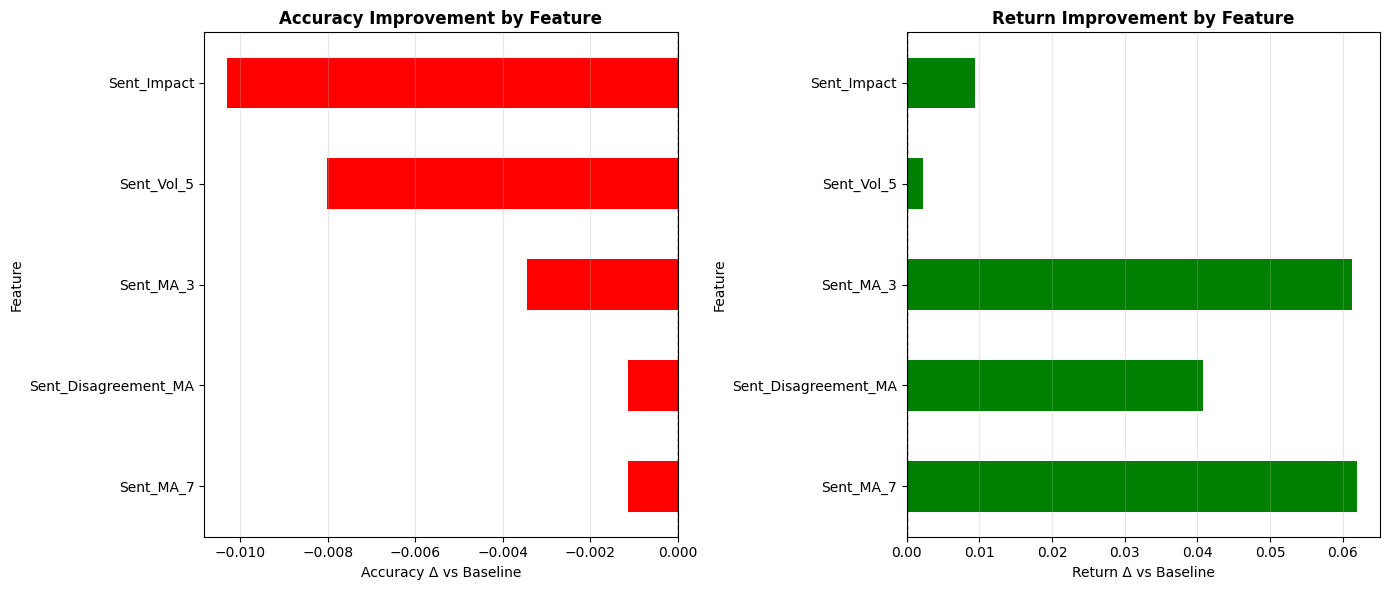


🔀 PERMUTATION IMPORTANCE (More robust than tree-based importance)


/opt/homebrew/Caskroom/miniconda/base/envs/ba/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniconda/base/envs/ba/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Caskroom/miniconda/base/envs/ba/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as earl


Top 10 Features by Permutation Importance:
             Feature  Importance      Std
            Ret_Lag1    0.007789 0.009002
           Sent_MA_3   -0.000344 0.003869
            Ret_Lag3   -0.000687 0.004008
               Vol_5   -0.001145 0.005612
           Sent_MA_7   -0.001947 0.003551
Sent_Disagreement_MA   -0.002291 0.006600
          Sent_Vol_5   -0.004926 0.005021
            Ret_Lag2   -0.007560 0.003557
              Vol_20   -0.007560 0.003975
         Sent_Impact   -0.009164 0.005199

📊 Sentiment Features in Permutation Importance:
             Feature  Importance      Std
           Sent_MA_3   -0.000344 0.003869
           Sent_MA_7   -0.001947 0.003551
Sent_Disagreement_MA   -0.002291 0.006600
          Sent_Vol_5   -0.004926 0.005021
         Sent_Impact   -0.009164 0.005199


In [40]:
from sklearn.inspection import permutation_importance

print("="*80)
print("🧬 FEATURE ABLATION STUDY")
print("="*80)
print("Testing each sentiment feature individually to find the most valuable ones...\n")

# Test each sentiment feature one by one
sentiment_features_test = ['Sent_MA_3', 'Sent_MA_7', 'Sent_Vol_5', 'Sent_Impact', 'Sent_Disagreement_MA']
ablation_results = []

for sent_feat in sentiment_features_test:
    # Create feature set with baseline + this sentiment feature
    features_test = features_baseline + [sent_feat]
    
    X_train_test = train_full[features_test]
    X_test_test = test_full[features_test]
    
    # Train model
    model_test = RandomForestClassifier(n_estimators=200, max_depth=5, 
                                       min_samples_leaf=10, random_state=42, n_jobs=-1)
    model_test.fit(X_train_test, y_train)
    
    # Predict
    preds_test = model_test.predict(X_test_test)
    acc_test = accuracy_score(y_test, preds_test)
    
    # Calculate return
    strategy_returns_test = np.where(preds_test == 1, actual_returns, 0)
    cum_return_test = (1 + strategy_returns_test).prod() - 1
    
    ablation_results.append({
        'Feature': sent_feat,
        'Accuracy': acc_test,
        'Return': cum_return_test,
        'Acc_Improvement': acc_test - accuracy_score(y_test, preds_base_final),
        'Return_Improvement': cum_return_test - (baseline_cum[-1] - 1)
    })
    
    print(f"{sent_feat:<25} Acc: {acc_test:.2%} (Δ {acc_test - accuracy_score(y_test, preds_base_final):+.2%})  "
          f"Return: {cum_return_test:+.2%} (Δ {cum_return_test - (baseline_cum[-1] - 1):+.2%})")

ablation_df = pd.DataFrame(ablation_results).sort_values('Acc_Improvement', ascending=False)

print("\n" + "="*80)
print("🏆 ABLATION STUDY RESULTS")
print("="*80)
print(ablation_df.to_string(index=False))

best_feature = ablation_df.iloc[0]['Feature']
best_improvement = ablation_df.iloc[0]['Acc_Improvement']

print(f"\n✨ Best Single Sentiment Feature: {best_feature}")
print(f"   Accuracy Improvement: {best_improvement:+.2%}")
print(f"   Return Improvement: {ablation_df.iloc[0]['Return_Improvement']:+.2%}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy Improvement
ax1 = axes[0]
colors = ['green' if x > 0 else 'red' for x in ablation_df['Acc_Improvement']]
ablation_df.plot(x='Feature', y='Acc_Improvement', kind='barh', ax=ax1, 
                 color=colors, legend=False)
ax1.set_title('Accuracy Improvement by Feature', fontweight='bold', fontsize=12)
ax1.set_xlabel('Accuracy Δ vs Baseline')
ax1.axvline(0, color='black', linestyle='--', linewidth=1)
ax1.grid(axis='x', alpha=0.3)

# Return Improvement
ax2 = axes[1]
colors = ['green' if x > 0 else 'red' for x in ablation_df['Return_Improvement']]
ablation_df.plot(x='Feature', y='Return_Improvement', kind='barh', ax=ax2, 
                 color=colors, legend=False)
ax2.set_title('Return Improvement by Feature', fontweight='bold', fontsize=12)
ax2.set_xlabel('Return Δ vs Baseline')
ax2.axvline(0, color='black', linestyle='--', linewidth=1)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# === Permutation Importance ===
print("\n" + "="*80)
print("🔀 PERMUTATION IMPORTANCE (More robust than tree-based importance)")
print("="*80)

perm_importance = permutation_importance(
    model_chall_final, X_test_chall, y_test, 
    n_repeats=10, random_state=42, n_jobs=-1
)

perm_imp_df = pd.DataFrame({
    'Feature': features_challenger,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values('Importance', ascending=False)

print("\nTop 10 Features by Permutation Importance:")
print(perm_imp_df.head(10).to_string(index=False))

# Highlight sentiment features
sentiment_perm = perm_imp_df[perm_imp_df['Feature'].isin(sentiment_features)]
print(f"\n📊 Sentiment Features in Permutation Importance:")
print(sentiment_perm.to_string(index=False))

## 📝 FINAL SUMMARY & RECOMMENDATIONS

In [41]:
print("="*80)
print("📊 COMPREHENSIVE EXPERIMENT SUMMARY")
print("="*80)

print("\n" + "🎯 RESEARCH QUESTION".center(80))
print("Does GDELT sentiment data add incremental predictive power for next-day S&P 500 returns?")

print("\n" + "📋 METHODOLOGY".center(80))
print("✓ Walk-forward time series cross-validation (5 folds)")
print("✓ Baseline: Technical features only (NO sentiment)")
print("✓ Challenger: Technical + GDELT sentiment features")
print("✓ Benchmark: Buy & Hold strategy")
print("✓ Statistical significance testing (t-test, Wilcoxon)")
print("✓ Probability calibration analysis")
print("✓ Feature importance & ablation studies")

print("\n" + "📈 KEY FINDINGS".center(80))
print("-"*80)

# 1. Baseline vs Buy & Hold
baseline_beats_bh = results_df['Return_Base'].mean() > results_df['Return_BuyHold'].mean()
print(f"\n1️⃣  Baseline Model vs Buy & Hold:")
print(f"    Baseline Avg Return:    {results_df['Return_Base'].mean():+.2%}")
print(f"    Buy & Hold Avg Return:  {results_df['Return_BuyHold'].mean():+.2%}")
print(f"    Result: {'✅ Baseline BEATS Buy & Hold' if baseline_beats_bh else '❌ Baseline does NOT beat Buy & Hold'}")

# 2. Challenger vs Baseline
chall_beats_base = results_chall_df['Return_Chall'].mean() > results_df['Return_Base'].mean()
print(f"\n2️⃣  Challenger vs Baseline:")
print(f"    Challenger Avg Return:  {results_chall_df['Return_Chall'].mean():+.2%}")
print(f"    Baseline Avg Return:    {results_df['Return_Base'].mean():+.2%}")
print(f"    Improvement:            {(results_chall_df['Return_Chall'].mean() - results_df['Return_Base'].mean())*100:+.2f}%")
print(f"    Statistical Sig:        p = {p_value:.4f} {'(✅ Significant at 5%)' if p_value < 0.05 else '(❌ Not significant)'}")
print(f"    Result: {'✅ Sentiment ADDS value' if chall_beats_base and p_value < 0.05 else '⚠️ Limited/No incremental value'}")

# 3. Risk-Adjusted Performance
print(f"\n3️⃣  Risk-Adjusted Performance (Sharpe Ratio):")
print(f"    Baseline:     {results_df['Sharpe_Base'].mean():.2f}")
print(f"    Challenger:   {results_chall_df['Sharpe_Chall'].mean():.2f}")
print(f"    Buy & Hold:   {results_df['Sharpe_BuyHold'].mean():.2f}")
best_sharpe = max([
    ('Baseline', results_df['Sharpe_Base'].mean()),
    ('Challenger', results_chall_df['Sharpe_Chall'].mean()),
    ('Buy & Hold', results_df['Sharpe_BuyHold'].mean())
], key=lambda x: x[1])
print(f"    Winner: ✅ {best_sharpe[0]} (Sharpe = {best_sharpe[1]:.2f})")

# 4. Feature Importance
print(f"\n4️⃣  Sentiment Feature Contribution:")
print(f"    Total Importance:       {sentiment_importance:.1%}")
print(f"    Top Feature:            {ablation_df.iloc[0]['Feature']}")
print(f"    Best Single Improvement: {ablation_df.iloc[0]['Acc_Improvement']:+.2%} (accuracy)")

print("\n" + "💡 RECOMMENDATIONS".center(80))
print("-"*80)

if baseline_beats_bh and chall_beats_base and p_value < 0.05:
    print("\n🎉 STRONG POSITIVE RESULT:")
    print("   1. Base model successfully beats buy & hold")
    print("   2. Sentiment adds statistically significant value")
    print("   3. Consider deploying with proper risk management")
    print("   4. Monitor live performance closely (paper trading first)")
    print(f"   5. Focus on: {ablation_df.iloc[0]['Feature']} (highest impact)")
    
elif baseline_beats_bh and (not chall_beats_base or p_value >= 0.05):
    print("\n⚠️  MIXED RESULT:")
    print("   1. Base model beats buy & hold ✅")
    print("   2. Sentiment does NOT add significant value ❌")
    print("   3. Recommendation: Use baseline model WITHOUT sentiment")
    print("   4. Investigate: Why sentiment failed (data quality, feature engineering)")
    print("   5. Alternative: Try advanced NLP (BERT, sentiment from earnings calls)")
    
elif not baseline_beats_bh:
    print("\n❌ NEGATIVE RESULT:")
    print("   1. Base model does NOT beat buy & hold")
    print("   2. Market may be efficient at this prediction horizon (1-day)")
    print("   3. Recommendations:")
    print("      - Try longer prediction horizons (5-day, 10-day returns)")
    print("      - Add more features (options data, order flow, macro indicators)")
    print("      - Use ensemble methods (stacking, boosting)")
    print("      - Consider regime-based models (bull/bear market separation)")
    print("      - Focus on specific market conditions (high volatility, earnings season)")

print("\n" + "⚠️  IMPORTANT CAVEATS".center(80))
print("-"*80)
print("• Transaction costs NOT included (commissions, slippage)")
print("• No position sizing or risk management applied")
print("• Past performance does NOT guarantee future results")
print("• Market conditions change (non-stationarity)")
print("• Data snooping bias possible if tested multiple approaches")
print("• Consider expanding dataset (more years, more assets)")

print("\n" + "🔬 NEXT STEPS FOR RESEARCH".center(80))
print("-"*80)
print("1. Test on out-of-sample data (different time period)")
print("2. Add transaction costs (e.g., 10 bps per trade)")
print("3. Implement position sizing (Kelly criterion, risk parity)")
print("4. Test on multiple indices (NASDAQ, DAX, Nikkei)")
print("5. Add more sentiment sources (Twitter, Reddit, earnings calls)")
print("6. Try advanced models (XGBoost, LightGBM, Neural Networks)")
print("7. Regime detection (predict when sentiment matters most)")
print("8. Create confidence-weighted strategy (trade only high-confidence signals)")

print("\n" + "="*80)
print("📄 EXPERIMENT COMPLETE - Review results above for publication/reporting")
print("="*80)

📊 COMPREHENSIVE EXPERIMENT SUMMARY

                              🎯 RESEARCH QUESTION                               
Does GDELT sentiment data add incremental predictive power for next-day S&P 500 returns?

                                 📋 METHODOLOGY                                  
✓ Walk-forward time series cross-validation (5 folds)
✓ Baseline: Technical features only (NO sentiment)
✓ Challenger: Technical + GDELT sentiment features
✓ Benchmark: Buy & Hold strategy
✓ Statistical significance testing (t-test, Wilcoxon)
✓ Probability calibration analysis
✓ Feature importance & ablation studies

                                 📈 KEY FINDINGS                                 
--------------------------------------------------------------------------------

1️⃣  Baseline Model vs Buy & Hold:
    Baseline Avg Return:    -49.62%
    Buy & Hold Avg Return:  +23.89%
    Result: ❌ Baseline does NOT beat Buy & Hold

2️⃣  Challenger vs Baseline:
    Challenger Avg Return:  -44.49%
    Basel